In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fifa = pd.read_csv('fifa_data.csv')

In [12]:
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [14]:
fifa['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [18]:
#Have to convert data into float or int
def convertdata(x):
    if type(x)==str:
        return float(x[:3])
    else:
        return x

In [20]:
convertdata('159abc')

159.0

In [38]:
#use [column].apply(fun_name) to convert a column
fifa['Weight']=fifa['Weight'].apply(convertdata)

In [40]:
fifa['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [84]:
#create groups
light_weight = fifa[fifa.Weight < 125].loc[:, 'Weight'].count()
light_medium = fifa[(fifa.Weight>= 125) & (fifa.Weight<150)].loc[:, 'Weight'].count()
medium_weight = fifa[(fifa.Weight >= 150) & (fifa.Weight<175)].loc[:, 'Weight'].count()
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight<200)].loc[:, 'Weight'].count()
heavy = fifa[fifa.Weight >= 200].loc[:, 'Weight'].count()

In [86]:
#now put all these in a list 
weight=[light_weight,light_medium,medium_weight,medium_heavy,heavy]


In [72]:
plt.style.use('ggplot')

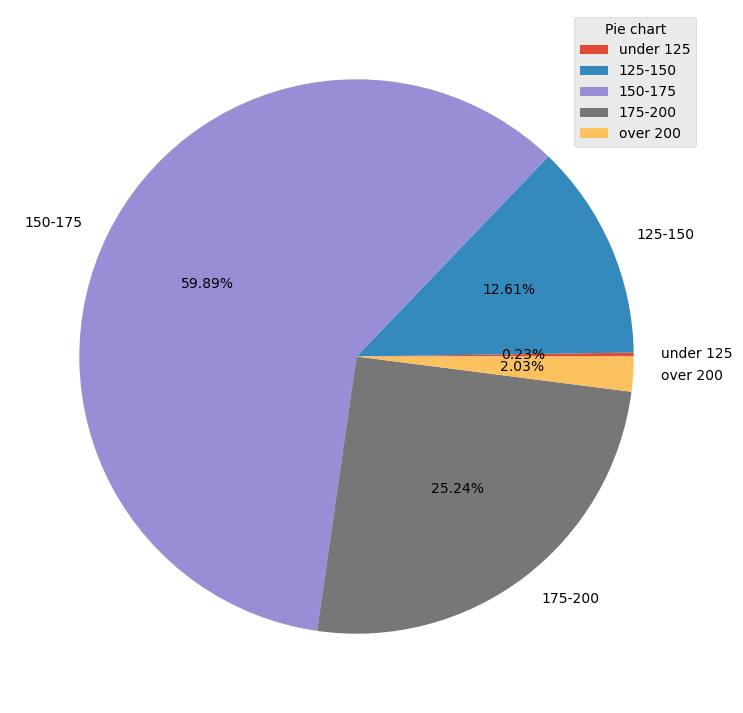

In [96]:
plt.figure(figsize=(9,9));
label=['under 125','125-150','150-175','175-200','over 200']
plt.pie(weight,labels=label,autopct='%.2f%%',pctdistance=0.6) #autopct for formating the data.
plt.legend(title="Pie chart")
plt.show()

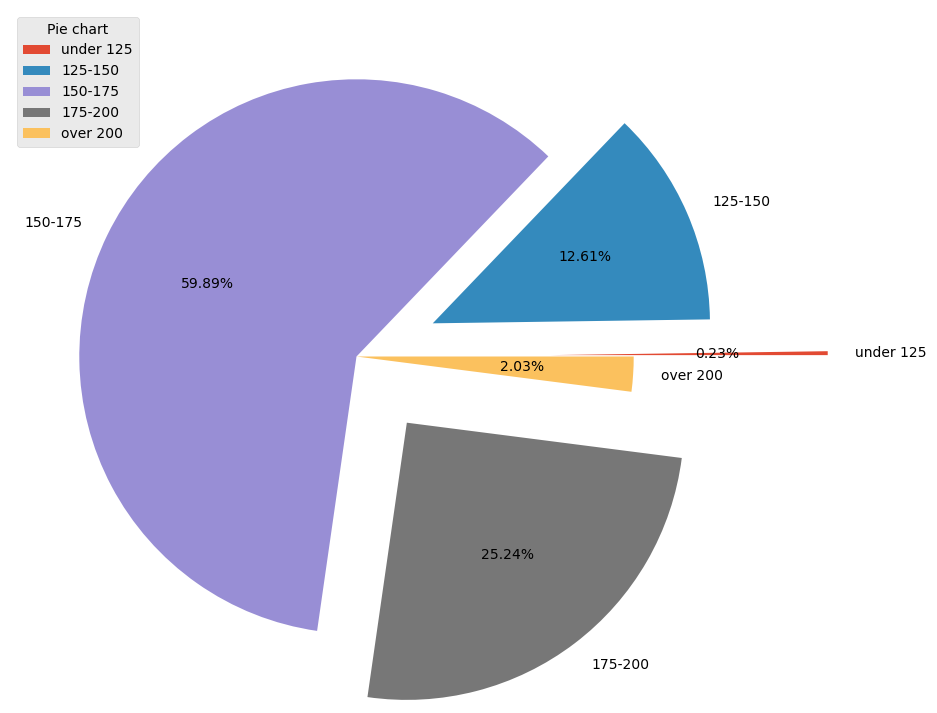

In [106]:
#explode any particular data
plt.figure(figsize=(9,9));
label=['under 125','125-150','150-175','175-200','over 200']
explodelist=[.7,.3,0,.3,0]
plt.pie(weight,labels=label,explode=explodelist,autopct='%.2f%%',pctdistance=0.6) #autopct for formating the data.
plt.legend(title="Pie chart")
plt.show()